In [1]:
import warnings
warnings.filterwarnings('ignore')

# Markdown
* a document formatting approach that makes writing documentation (or anything) pretty easy
* can do markdown outside of jupyter
    * filename `somefile.md`
* you can make code cells

```python
def example_function(x):
    return f'I am {x}'
```



# Machine Learning Issues

![xkcd_curve_fitting.png](images/xkcd_curve_fitting.png)

# Let's consider a scatterplot
* at differing levels of complexity
    * complexity can refer to number of features, width of a matrix, etc
    * complexity here just means order of a polynomial
    
$$
f(x) = ax^4 + bx^3 + cx^2 + dx + C
$$

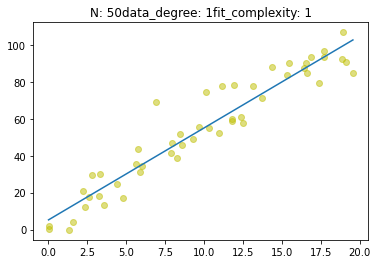

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scatter_fit(num_samps=50, fit_complexity=1, degree=1):
    N = num_samps
    
    np.random.seed(seed=23)
    
    # gen rand x vals
    x = np.random.rand(N)*20
    
    
    # define polynomial
    if degree == 1:
        y = 5*x + 3
    elif degree == 2:
        y = 3*x**2 + 5*x + 3
    elif degree == 3:
        y = -0.2*x**3 + 3*x**2 + 5*x + 3
    elif degree == 4:
        y = 0.006*x**4 + -0.2*x**3 + 3*x**2 + 5*x + 3


    # help us draw a fit line
    fit = np.polyfit(x, y, 1)
    fit_fn = np.poly1d(fit)
    
    
    # get scatter range
    y_val_range = np.ptp(y)
    
    
    # add guassian/normal noise
    y = [pt + np.random.normal(loc=0.0, scale=((1./10.)*y_val_range)) 
         for pt in y]

    # line that we draw
    fit_complexity_ = fit_complexity
    regr = np.poly1d(np.polyfit(x, y, fit_complexity_))(np.unique(x))

    
    # plot
    plt.title('N: {}'.format(N) + \
              'data_degree: {}'.format(degree) + \
              'fit_complexity: {}'.format(fit_complexity))
    
    plt.scatter(x, y, c='y', alpha=0.5)
    plt.plot(np.unique(x), regr)
    
    plt.show()
    
plot_scatter_fit(num_samps=50, fit_complexity=1, degree=1)